# Generalised Least Squares (GLS)
We have now seen methods that we can use to accomodate non-normality of the residuals, as well as capturing more complex relationships in the data, improving our ability to interpret the regression model, dealing with outliers and dealing with multicollinearity. However, the one issues we have yet to address is how to accommodate unequal variances across the range of the outcome variable, a situation known as *heteroscedasticity*. In this section, we will see a way of doing this using an approach known as *Generalised Least Squares*, that can be fit within `R` using the `nlme` package and REML estimation.

## Ridge Regression

## Generalised Least Squares (GLS)

### Estimating GLS using REML

### Using the `gls()` function in `R` 

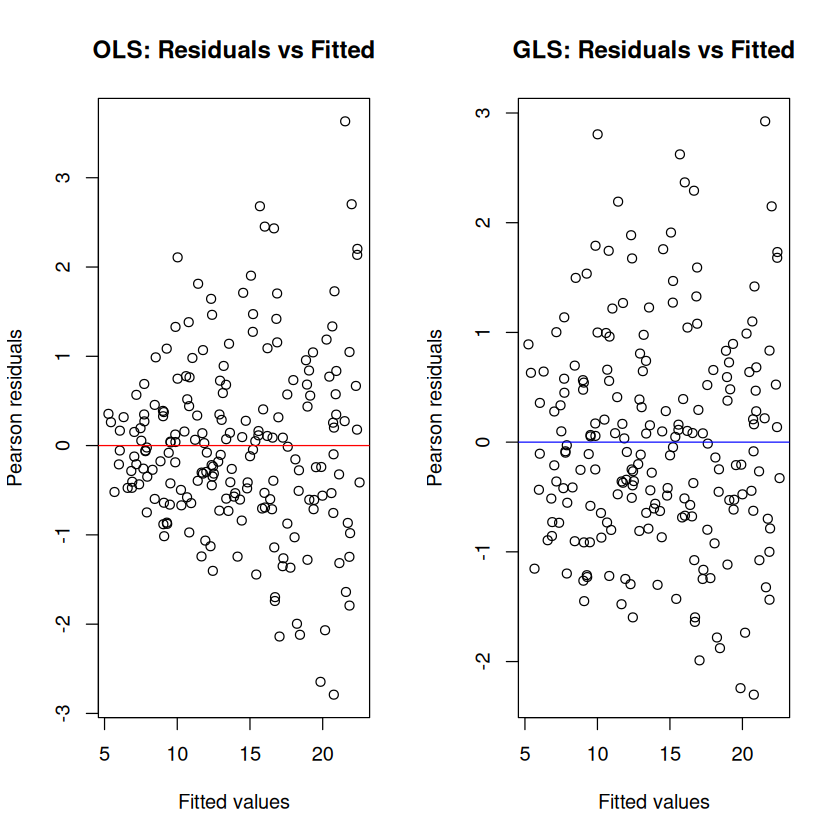

In [5]:
# Load required package
library(nlme)

# Step 1: Simulate heteroscedastic data
set.seed(123)
n <- 200
x <- runif(n, 1, 10)
y <- 3 + 2 * x + rnorm(n, sd = x)  # Variance increases with x

dat <- data.frame(x = x, y = y)

# Step 2: Fit an OLS model
lm_model <- lm(y ~ x, data = dat)

# Step 3: Fit a GLS model with varFixed (variance ∝ x^2)
gls_model <- gls(y ~ x, data = dat, weights = varFixed(~ x))

# Step 4: Set up residual vs fitted plots
par(mfrow = c(1, 2))  # Two plots side by side

# Manual Pearson residuals from lm
pearson_lm  <- resid(lm_model) / summary(lm_model)$sigma

# Automatic Pearson residuals from gls
pearson_gls <- resid(gls_model, type = "pearson")

# OLS residuals vs fitted
plot(fitted(lm_model), pearson_lm,
     xlab = "Fitted values", ylab = "Pearson residuals",
     main = "OLS: Residuals vs Fitted")
abline(h = 0, col = "red")

# GLS residuals vs fitted (Pearson residuals)
plot(fitted(gls_model), pearson_gls,
     xlab = "Fitted values", ylab = "Pearson residuals",
     main = "GLS: Residuals vs Fitted")
abline(h = 0, col = "blue")


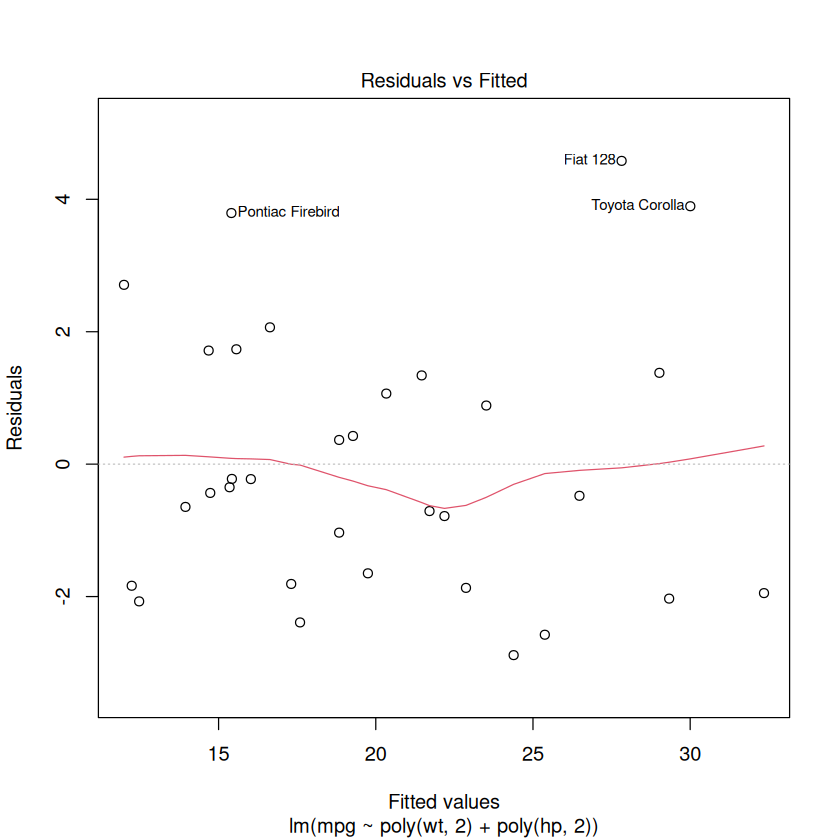

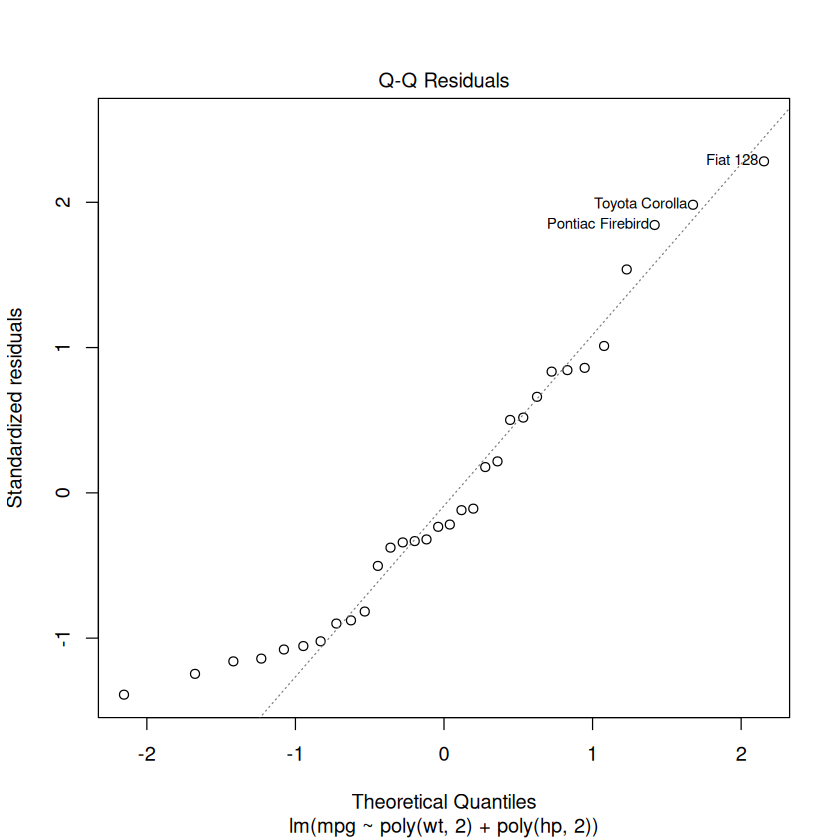

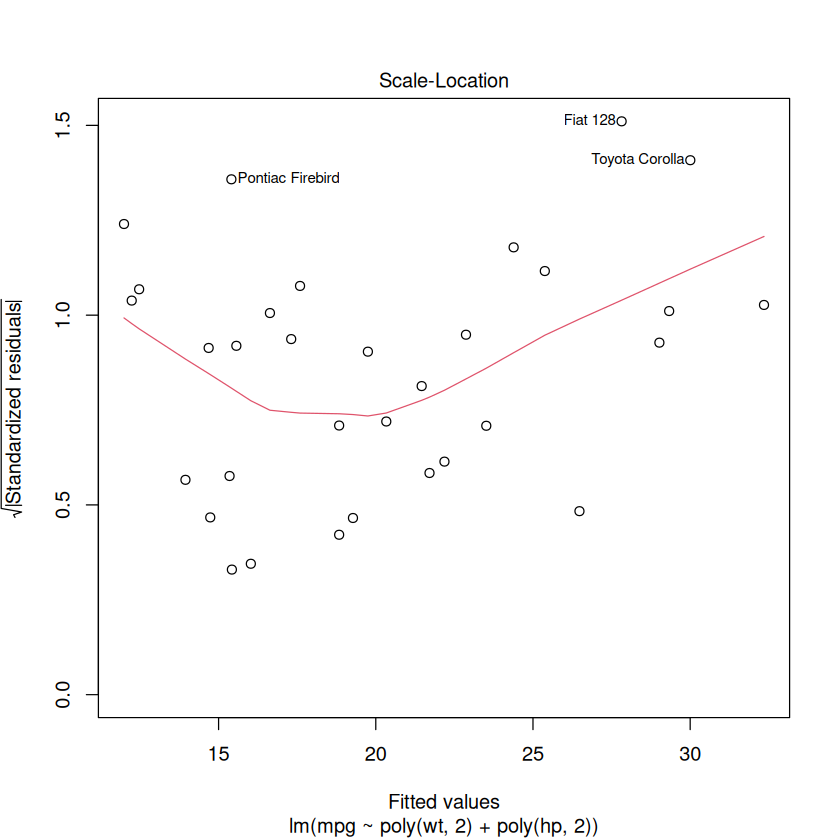

Generalized least squares fit by REML
  Model: mpg ~ poly(wt, 2) + poly(hp, 2) 
  Data: mtcars 
       AIC     BIC    logLik
  135.8209 143.596 -61.91047

Variance function:
 Structure: fixed weights
 Formula: ~wt 

Coefficients:
                  Value Std.Error  t-value p-value
(Intercept)   20.090625  0.413848 48.54585  0.0000
poly(wt, 2)1 -18.638395  3.585200 -5.19870  0.0000
poly(wt, 2)2   6.913681  2.428640  2.84673  0.0083
poly(hp, 2)1 -12.837719  3.257500 -3.94097  0.0005
poly(hp, 2)2   5.332235  2.583345  2.06408  0.0487

 Correlation: 
             (Intr) ply(w,2)1 ply(w,2)2 ply(h,2)1
poly(wt, 2)1  0.195                              
poly(wt, 2)2  0.000  0.157                       
poly(hp, 2)1  0.000 -0.669     0.121             
poly(hp, 2)2  0.000  0.427    -0.129    -0.258   

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.4042037 -0.6892502 -0.1362260  0.6353802  2.3587996 

Residual standard error: 1.305191 
Degrees of freedom: 32 to

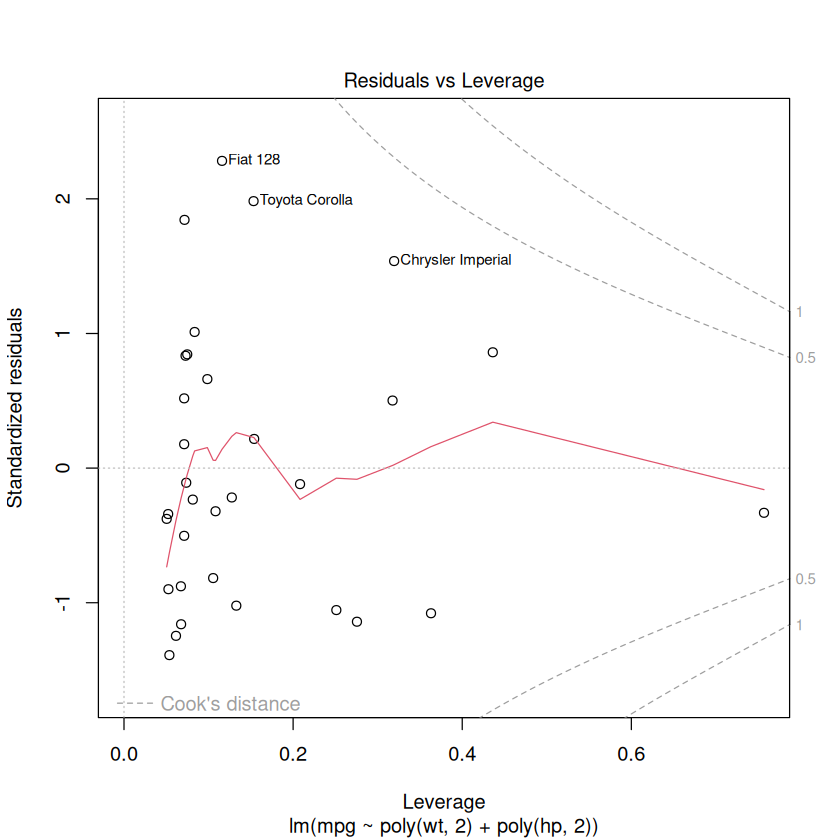

Generalized least squares fit by REML
  Model: mpg ~ cyl 
  Data: mtcars 
       AIC      BIC   logLik
  160.3354 168.5392 -74.1677

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | cyl 
 Parameter estimates:
       6        4        8 
1.000000 3.102593 1.761218 

Coefficients:
                 Value Std.Error   t-value p-value
(Intercept)  26.663636  1.359764 19.609017   0e+00
cyl6         -6.920779  1.466559 -4.719060   1e-04
cyl8        -11.563636  1.522199 -7.596665   0e+00

 Correlation: 
     (Intr) cyl6  
cyl6 -0.927       
cyl8 -0.893  0.828

Standardized residuals:
         Min           Q1          Med           Q3          Max 
-1.835902926 -0.741512560  0.004788824  0.836210027  1.604576731 

Residual standard error: 1.453567 
Degrees of freedom: 32 total; 29 residual

Analysis of Deviance Table (Type II tests)

Response: mpg
    Df  Chisq Pr(>Chisq)    
cyl  2 65.587  5.728e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


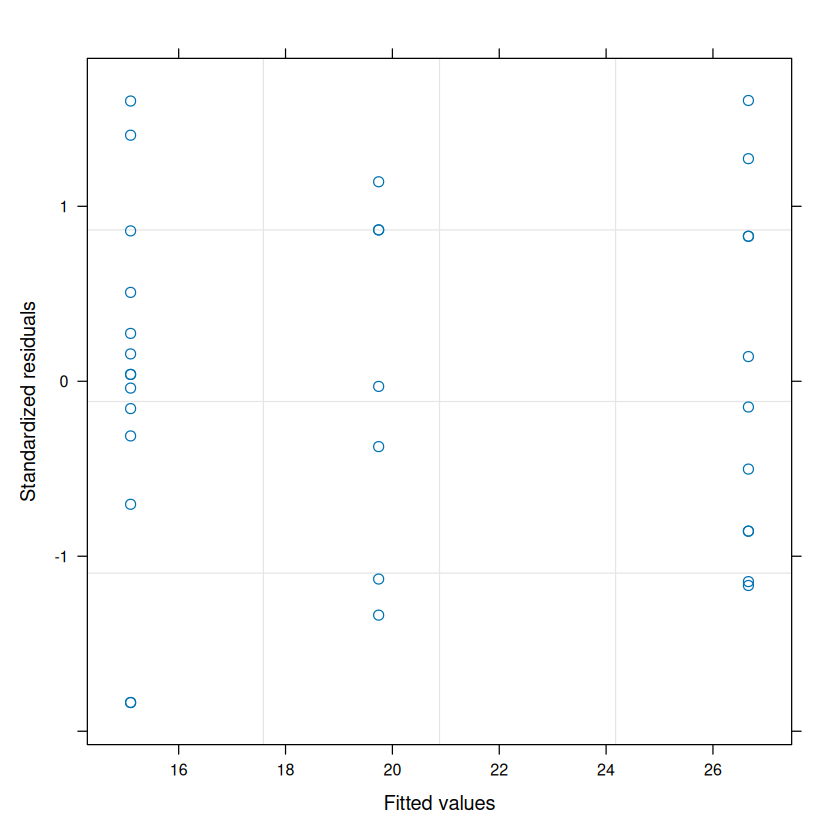

In [19]:
library(nlme)
library(car)
library(emmeans)
data(mtcars)

mod <- lm(mpg ~ poly(wt,2) + poly(hp,2), data=mtcars)
plot(mod)

mod.2 <- gls(mpg ~ poly(wt,2) + poly(hp,2), weights=varFixed(~wt), data=mtcars)
summary(mod.2)

mtcars$cyl <- as.factor(mtcars$cyl)

mod.3 <- gls(mpg ~ cyl, data=mtcars, weights=varIdent(form=~1|cyl))
plot(mod.3)
summary(mod.3)
print(Anova(mod.3))

### Using Variance Weights with `lm()` and `lmp()`

This would be useful in cases of severe departures from both the normality and homoscedasticity assumptions, where a Box-Cox transformation has not resulted in a suitable transformation. In these cases, we can use the simulated sampling distributions of the test statistics from the permutation framework, whilst also weighting the estimation to accommodate non-constant variance. The only limitation here is that more general variance structures are not available, we need to specifiy the reciprocal of a variable explicitly, and we need to use $\sqrt{w_{i}}e_{i}$ for diagnostics, so that the effect of the weights is correctly visualised (CHECK THIS IS TRUE).